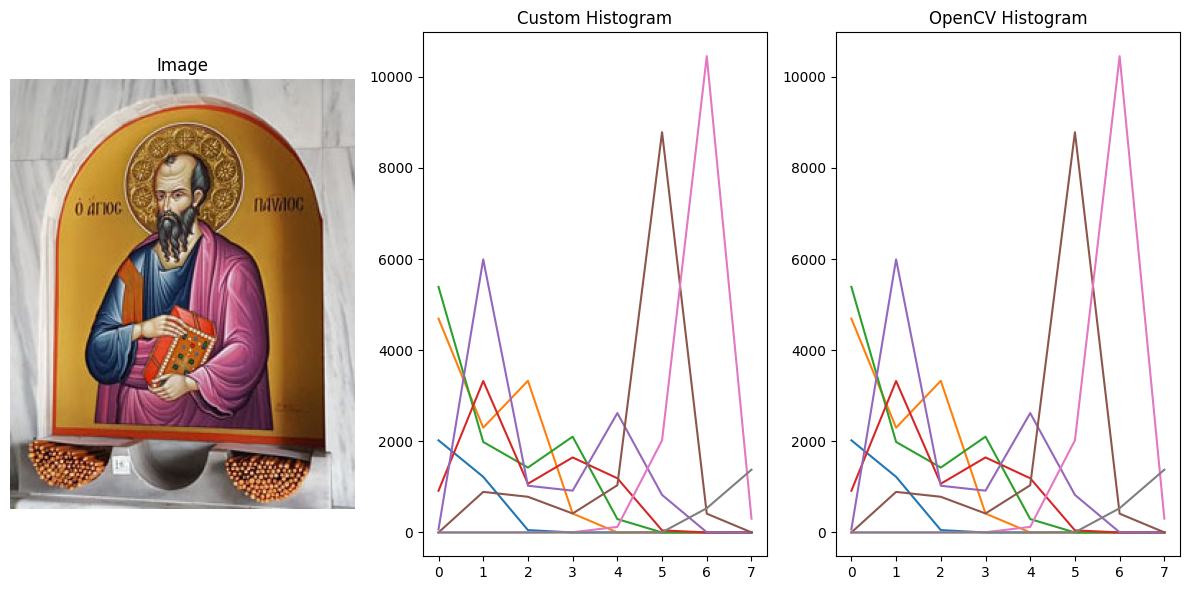

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calc_histo(image, histChannels, histSize, histRanges):
    ch = len(histChannels)
    shape = histSize if ch > 1 else (histSize[0], 1)
    hist = np.zeros(shape, np.float32)  # 히스토그램 누적 행렬
    gap = np.divide(histRanges[1::2], histSize)  # 계급 간격

    for row in image:  # 2차원 행렬 순회 방식
        for pixel in row:
            idx = np.divide( pixel[ histChannels ], gap).astype('uint')
            hist[ tuple(idx) ] += 1
        pass
    pass

    return hist
pass

# 이미지 읽기
image = cv2.imread("img/pixel.jpg")  # Ensure the image path is correct

# 히스토그램 설정
histChannels = [0, 1]
histSize = [8, 8]
histRanges = [ 0, 256, 0, 256 ]  # 히스토그램 간격수, 값 범위
hist1 = calc_histo(image, histChannels, histSize, histRanges)  # 사용자 정의 히스토그램 계산
hist2 = cv2.calcHist([image], histChannels, None, histSize, histRanges)  # OpenCV 함수 이용

# 결과 출력 (한 번에 subplot 정의)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 이미지 출력
axs[0].imshow(image[:, :, ::-1])  # OpenCV는 BGR, matplotlib는 RGB이므로 변환
axs[0].axis('off')
axs[0].set_title('Image')

# 사용자 정의 히스토그램 (hist1)
axs[1].plot( hist1 )  # 2D 배열을 1D로 펼침
axs[1].set_title('Custom Histogram')

# OpenCV 히스토그램 (hist2)
axs[2].plot( hist2 )  # 2D 배열을 1D로 펼침
axs[2].set_title('OpenCV Histogram')

plt.tight_layout()
plt.show()
